# Visualizing Level 2 Imerg data (Ku)

In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [4]:
filename = '/home/aniket/aniket-backup/anthromet/imerg-data/2b/2B.GPM.DPRGMI.CORRA2022.20161006-S084921-E102153.014807.V07A.hdf5'

Getting KU data set information from: https://gpmweb2https.pps.eosdis.nasa.gov/pub/GPMfilespec/filespec.GPM.pdf#page=1468

In [5]:
data = h5py.File(filename, 'r')

longs = data['/KuKaGMI/Longitude'][:]
lats = data['/KuKaGMI/Latitude'][:]

airPressure = data['/KuKaGMI/airPressure'][:,:,0]
# airTemperature = data['/KuKaGMI/airTemperature'][:,:,0]

nearSurfPrecipTotRate = data['/KuKaGMI/nearSurfPrecipTotRate'][:,:]

nearSurfPrecipTotRate

array([[-9999.9, -9999.9, -9999.9, ..., -9999.9, -9999.9, -9999.9],
       [-9999.9, -9999.9, -9999.9, ..., -9999.9, -9999.9, -9999.9],
       [-9999.9, -9999.9, -9999.9, ..., -9999.9, -9999.9, -9999.9],
       ...,
       [-9999.9, -9999.9, -9999.9, ..., -9999.9, -9999.9, -9999.9],
       [-9999.9, -9999.9, -9999.9, ..., -9999.9, -9999.9, -9999.9],
       [-9999.9, -9999.9, -9999.9, ..., -9999.9, -9999.9, -9999.9]],
      dtype=float32)

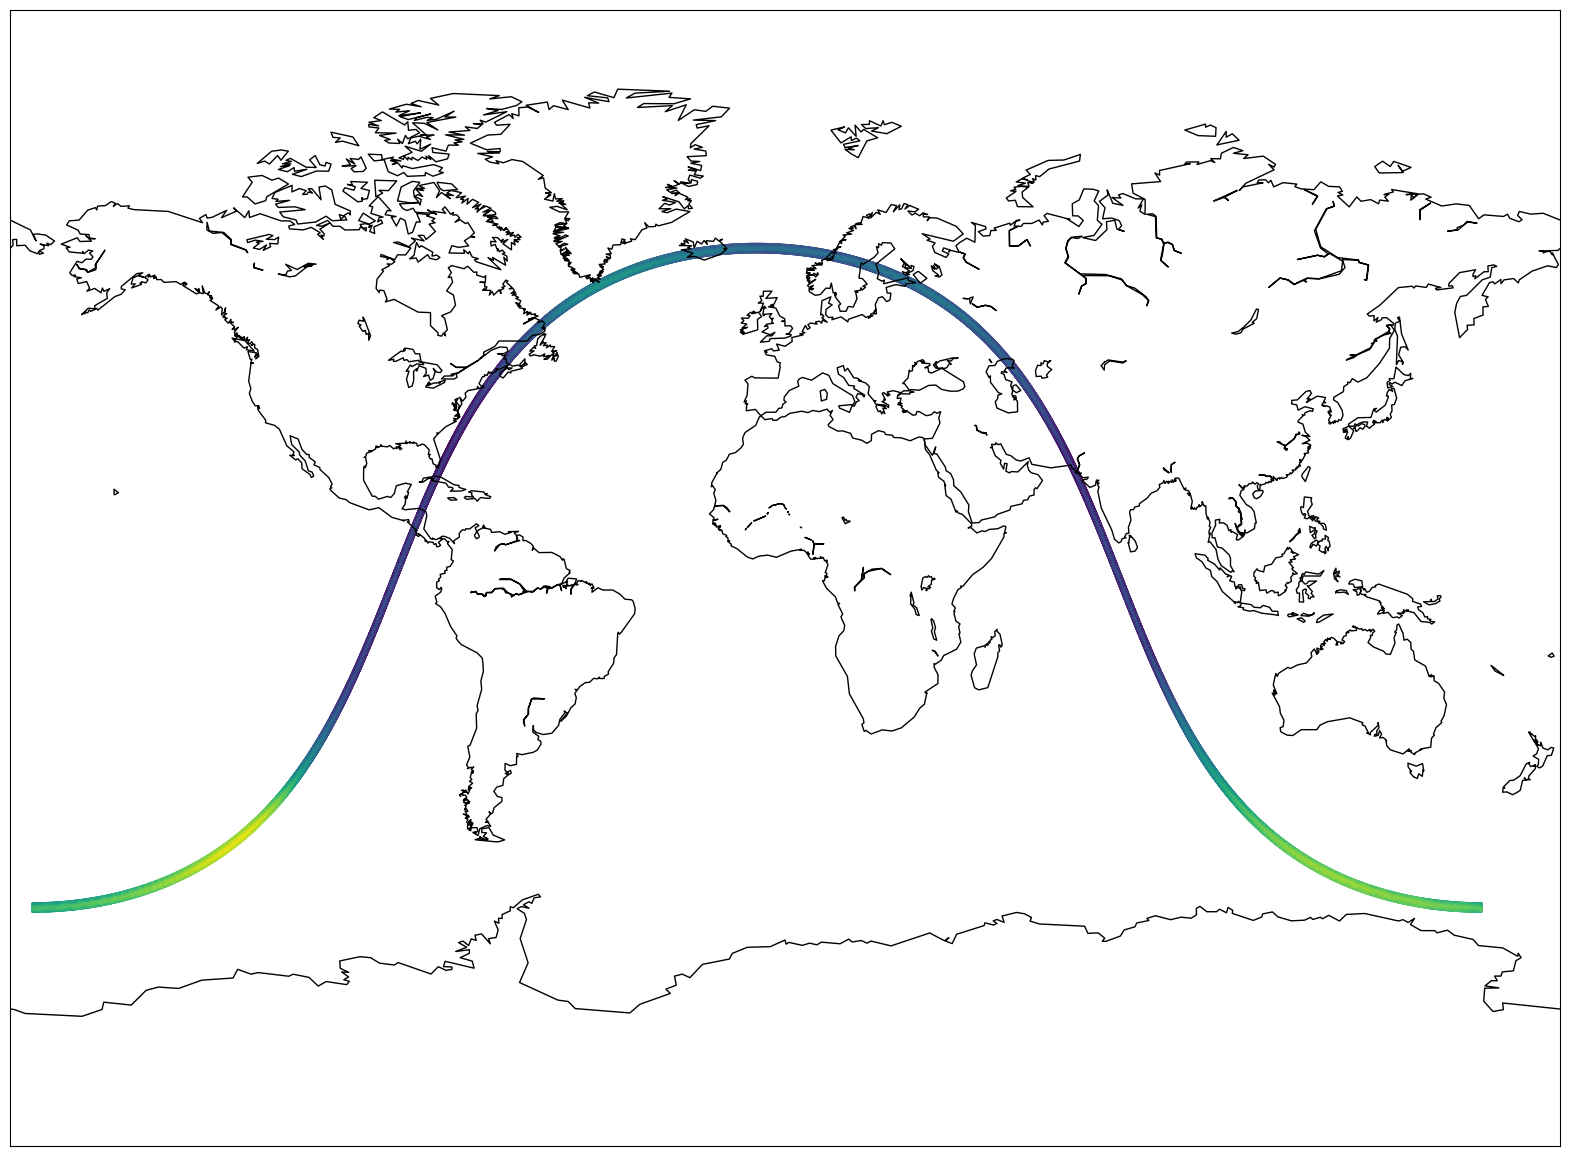

In [6]:
figsize = (20, 20)

fig, axes = plt.subplots(figsize=figsize)
# plotting elevation
map_elevation = Basemap(projection='mill', lon_0=0)
map_elevation.drawcoastlines()
x, y = map_elevation(longs, lats)
im = map_elevation.scatter(x, y, c=airPressure, cmap='viridis_r', zorder=1, s=1)
plt.show()

## Ku PRE group
https://gpmweb2https.pps.eosdis.nasa.gov/pub/GPMfilespec/filespec.GPM.pdf#page=1485

In [7]:

# Elevation of the measurement point. It is a copy of DEMHmean of level 1B product. Values are in m.
elevation = data['/FS/PRE/elevation']

# Precipitation or no precipitation.
flagPrecip = data['/FS/PRE/flagPrecip']

snowIceCover = data['/FS/PRE/snowIceCover']

landSurfaceType = data['/FS/PRE/landSurfaceType']
''' Land Surface Type
0 - 99 Ocean
100 - 199 Land
200 - 299 Coast
300 - 399 Inland water
-9999 Missing value
'''


' Land Surface Type\n0 - 99 Ocean\n100 - 199 Land\n200 - 299 Coast\n300 - 399 Inland water\n-9999 Missing value\n'

In [19]:
u, c = zip(np.unique(elevation, return_counts=True))

my_dict = {key: value for key, value in zip(u[0], c[0])}

print(my_dict)

{-50.0: 164, -49.0: 711, -48.0: 1480, -47.0: 1709, -46.0: 3073, -45.0: 2495, -44.0: 2276, -43.0: 1932, -42.0: 639, -41.0: 1086, -40.0: 2869, -39.0: 2293, -38.0: 2597, -37.0: 2277, -36.0: 2277, -35.0: 2179, -34.0: 2328, -33.0: 1841, -32.0: 1349, -31.0: 1164, -30.0: 898, -29.0: 690, -28.0: 740, -27.0: 724, -26.0: 812, -25.0: 757, -24.0: 699, -23.0: 691, -22.0: 635, -21.0: 564, -20.0: 533, -19.0: 454, -18.0: 433, -17.0: 409, -16.0: 441, -15.0: 453, -14.0: 431, -13.0: 424, -12.0: 422, -11.0: 410, -10.0: 426, -9.0: 443, -8.0: 641, -7.0: 6483, -6.0: 5851, -5.0: 3523, -4.0: 2815, -3.0: 2746, -2.0: 2422, -1.0: 2873, 0.0: 3629, 1.0: 3545, 2.0: 3733, 3.0: 3803, 4.0: 3631, 5.0: 5007, 6.0: 6427, 7.0: 6534, 8.0: 4172, 9.0: 3704, 10.0: 2687, 11.0: 3113, 12.0: 4960, 13.0: 5032, 14.0: 4548, 15.0: 4611, 16.0: 6203, 17.0: 5522, 18.0: 5727, 19.0: 5783, 20.0: 6927, 21.0: 3771, 22.0: 2636, 23.0: 2837, 24.0: 3143, 25.0: 3898, 26.0: 3820, 27.0: 4258, 28.0: 3362, 29.0: 3630, 30.0: 3818, 31.0: 2579, 32.0: 1239

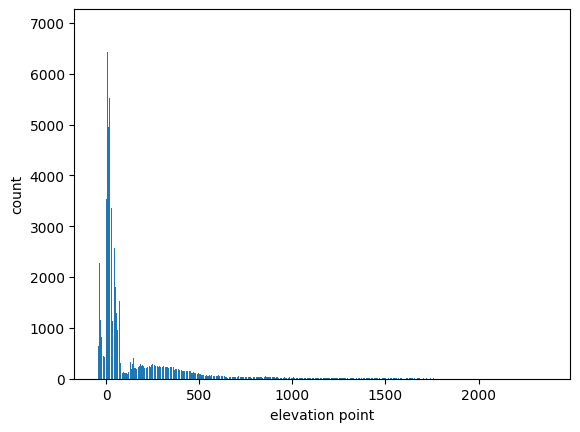

In [21]:
u, c = zip(np.unique(elevation, return_counts=True))
plt.bar(u[0], c[0])
plt.xlabel('elevation point')
plt.ylabel('count')
plt.show()

NameError: name 'elevation' is not defined

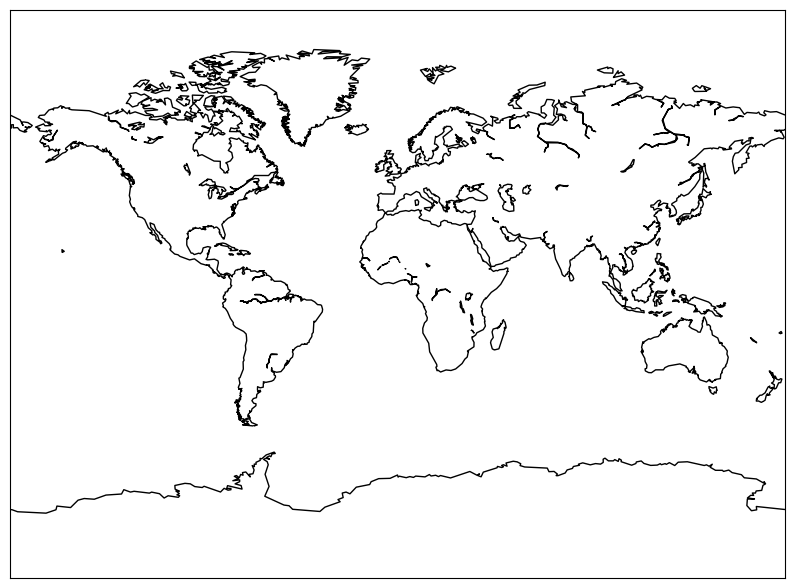

In [27]:
figsize = (10, 10)

fig, axes = plt.subplots(figsize=figsize)
# plotting elevation
map_elevation = Basemap(projection='mill', lon_0=0)
map_elevation.drawcoastlines()
x, y = map_elevation(longs, lats)
im = map_elevation.scatter(x, y, c=elevation, cmap='terrain', zorder=1, s=1)
plt.show()


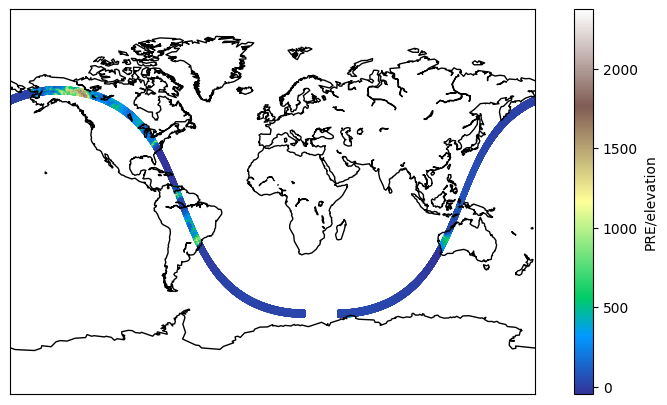

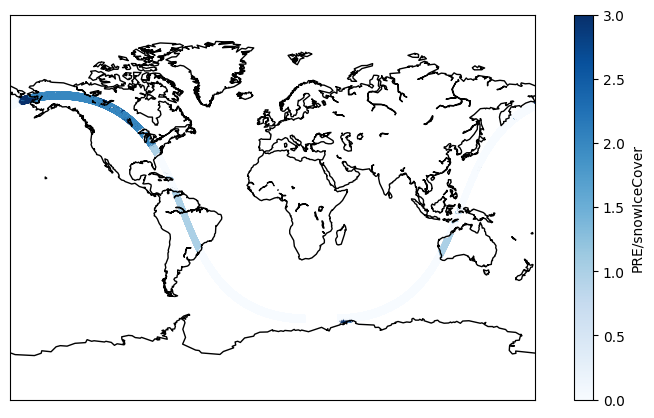

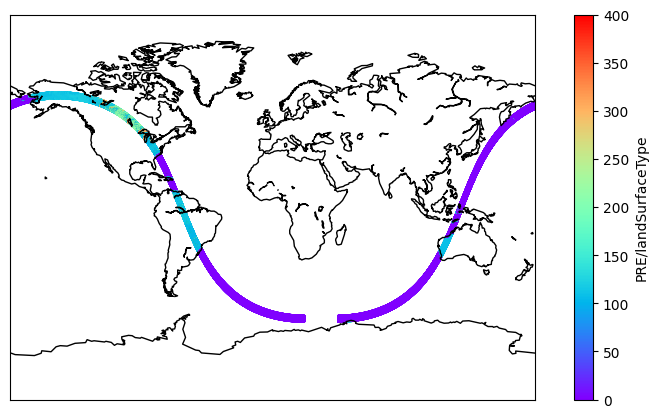

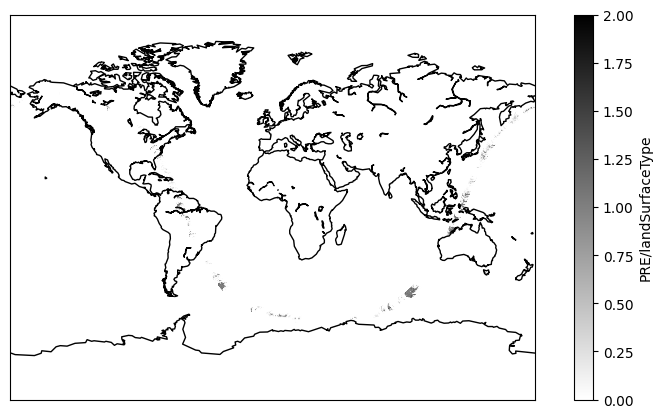

In [19]:
figsize = (10, 5)

fig, axes = plt.subplots(figsize=figsize)
# plotting elevation
map_elevation = Basemap(projection='mill', lon_0=0)
map_elevation.drawcoastlines()
x, y = map_elevation(longs, lats)
im = map_elevation.scatter(x, y, c=elevation, cmap='terrain', zorder=1, s=1)
cbar = plt.colorbar(im, label='PRE/elevation')
plt.show()

fig, axes = plt.subplots(figsize=figsize)
# plotting snow ice cover
map_snowIceCover = Basemap(projection='mill', lon_0=0)
map_snowIceCover.drawcoastlines()
x, y = map_snowIceCover(longs, lats)
im = map_snowIceCover.scatter(x, y, c=snowIceCover, cmap='Blues', zorder=1, s=1)
cbar = plt.colorbar(im, label='PRE/snowIceCover')
plt.show()

fig, axes = plt.subplots(figsize=figsize)
# plotting land surface type
map_landSurfaceType = Basemap(projection='mill', lon_0=0)
map_landSurfaceType.drawcoastlines()
x, y = map_landSurfaceType(longs, lats)
im = map_landSurfaceType.scatter(x, y, c=landSurfaceType, vmin=0, vmax=400, cmap='rainbow', zorder=1, s=1)
cbar = plt.colorbar(im, label='PRE/landSurfaceType')
plt.show()

fig, axes = plt.subplots(figsize=figsize)
# plotting flag precip
map_flagPrecip = Basemap(projection='mill', lon_0=0)
map_flagPrecip.drawcoastlines()
x, y = map_flagPrecip(longs, lats)
im = map_flagPrecip.scatter(x, y, c=flagPrecip, cmap='binary', zorder=1, s=1)
cbar = plt.colorbar(im, label='PRE/landSurfaceType')
plt.show()

## Ku VER Group
https://gpmweb2https.pps.eosdis.nasa.gov/pub/GPMfilespec/filespec.GPM.pdf#page=1488

In [6]:
airTemperature = data['/FS/VER/airTemperature']
# Air Temperature. Values are in K

piaNP = data['/FS/VER/piaNP']
#Path integrated attenuation caused by non-precipitation particles (cloud liquid water, cloud ice water, water vapor, and oxygen molecules). Values are in dB.

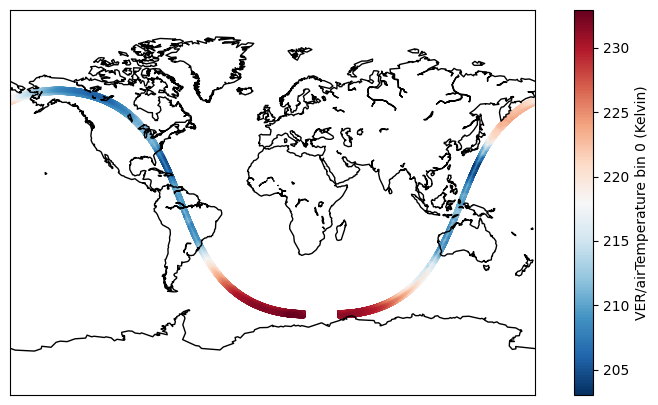

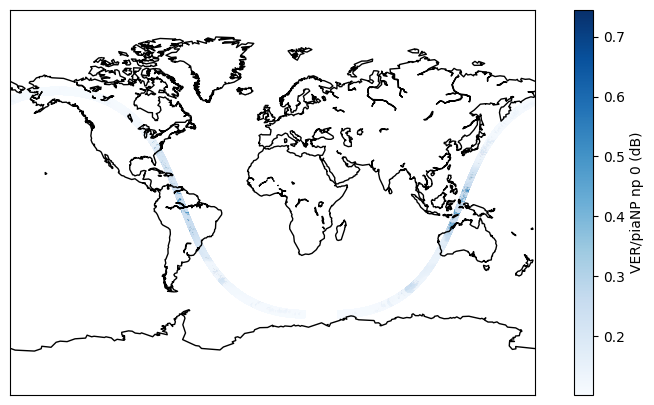

In [7]:
figsize = (10, 5)

fig, axes = plt.subplots(figsize=figsize)
# plotting elevation
map_airTemperature = Basemap(projection='mill', lon_0=0)
map_airTemperature.drawcoastlines()
x, y = map_airTemperature(longs, lats)
im = map_airTemperature.scatter(x, y, c=airTemperature[:,:,0], cmap='RdBu_r', zorder=1, s=1)
cbar = plt.colorbar(im, label='VER/airTemperature bin 0 (Kelvin)')
plt.show()

fig, axes = plt.subplots(figsize=figsize)
# plotting snow ice cover
map_piaNP = Basemap(projection='mill', lon_0=0)
map_piaNP.drawcoastlines()
x, y = map_piaNP(longs, lats)
im = map_piaNP.scatter(x, y, c=piaNP[:,:,0], cmap='Blues', zorder=1, s=1)
cbar = plt.colorbar(im, label='VER/piaNP np 0 (dB)')
plt.show()

## Ku CSF Group
https://gpmweb2https.pps.eosdis.nasa.gov/pub/GPMfilespec/filespec.GPM.pdf#page=1489

In [8]:
binHeavyIcePrecipTop = data['/FS/CSF/binHeavyIcePrecipTop']
# Range bin number for the top of heavy ice precip.

binHeavyIcePrecipBottom = data['/FS/CSF/binHeavyIcePrecipBottom']
# Range bin number for the bottom of heavy ice precip

nHeavyIcePrecip = data['/FS/CSF/nHeavyIcePrecip']

flagBB = data['/FS/CSF/flagBB']
'''
Bright band (BB) exists or not. The definition is different for L2 DPR on the one hand
and L2 Ku and L2 Ka on the other.
L2 DPR:
0 no Bright Band
1 Bright Band detected by Ku and DFRm
2 Bright Band detected by Ku only
3 Bright Band detected by DFRm only
-1111 No rain value
-9999 Missing value
'''

'\nBright band (BB) exists or not. The definition is different for L2 DPR on the one hand\nand L2 Ku and L2 Ka on the other.\nL2 DPR:\n0 no Bright Band\n1 Bright Band detected by Ku and DFRm\n2 Bright Band detected by Ku only\n3 Bright Band detected by DFRm only\n-1111 No rain value\n-9999 Missing value\n'

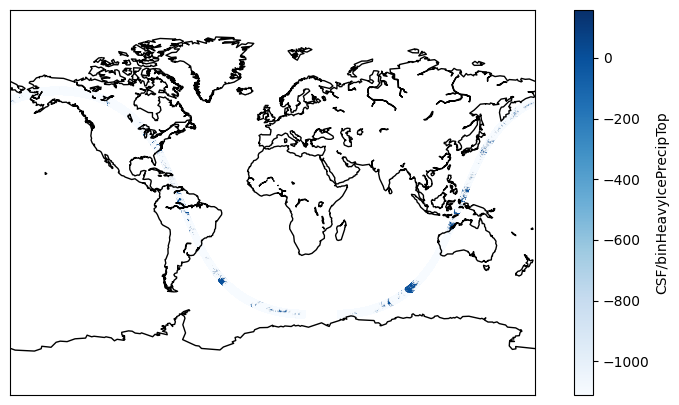

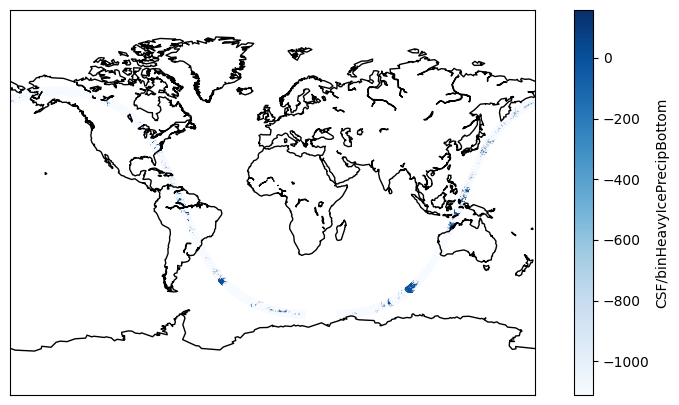

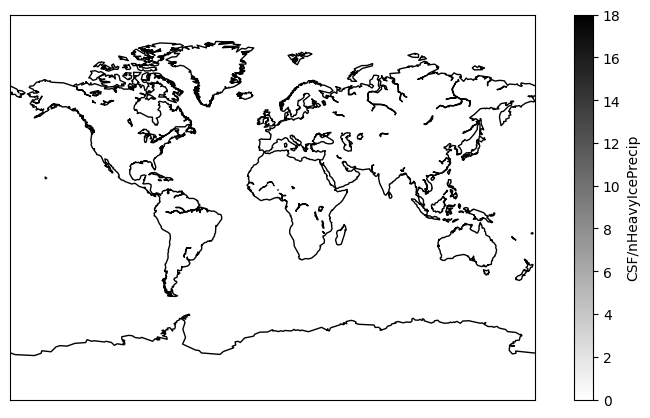

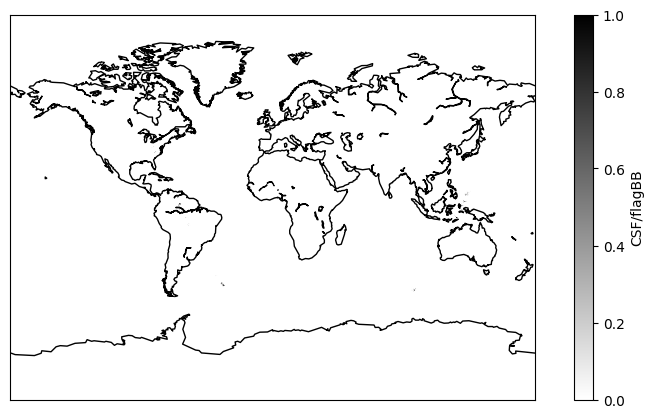

In [9]:
figsize = (10, 5)

fig, axes = plt.subplots(figsize=figsize)
# plotting binHeavyIcePrecipTop
map_binHeavyIcePrecipTop = Basemap(projection='mill', lon_0=0)
map_binHeavyIcePrecipTop.drawcoastlines()
x, y = map_binHeavyIcePrecipTop(longs, lats)
im = map_binHeavyIcePrecipTop.scatter(x, y, c=binHeavyIcePrecipTop, cmap='Blues', zorder=1, s=1)
cbar = plt.colorbar(im, label='CSF/binHeavyIcePrecipTop')
plt.show()

fig, axes = plt.subplots(figsize=figsize)
# plotting binHeavyIcePrecipBottom
map_binHeavyIcePrecipBottom = Basemap(projection='mill', lon_0=0)
map_binHeavyIcePrecipBottom.drawcoastlines()
x, y = map_binHeavyIcePrecipBottom(longs, lats)
im = map_binHeavyIcePrecipBottom.scatter(x, y, c=binHeavyIcePrecipBottom, cmap='Blues', zorder=1, s=1)
cbar = plt.colorbar(im, label='CSF/binHeavyIcePrecipBottom')
plt.show()


fig, axes = plt.subplots(figsize=figsize)
# plotting nHeavyIcePrecip
map_nHeavyIcePrecip = Basemap(projection='mill', lon_0=0)
map_nHeavyIcePrecip.drawcoastlines()
x, y = map_nHeavyIcePrecip(longs, lats)
im = map_nHeavyIcePrecip.scatter(x, y, c=nHeavyIcePrecip, cmap='binary', zorder=1, s=1)
cbar = plt.colorbar(im, label='CSF/nHeavyIcePrecip')
plt.show()


fig, axes = plt.subplots(figsize=figsize)
# plotting flagBB
map_flagBB = Basemap(projection='mill', lon_0=0)
map_flagBB.drawcoastlines()
x, y = map_flagBB(longs, lats)
im = map_flagBB.scatter(x, y, c=flagBB, vmin=0, vmax=1, cmap='binary', zorder=1, s=1)
cbar = plt.colorbar(im, label='CSF/flagBB')
plt.show()


## Ku SRT Group
https://gpmweb2https.pps.eosdis.nasa.gov/pub/GPMfilespec/filespec.GPM.pdf#page=1497

In [10]:
pathAtten = data['/FS/SRT/pathAtten']

PIAalt = data['/FS/SRT/PIAalt']

PIAhybrid = data['/FS/SRT/PIAhybrid']

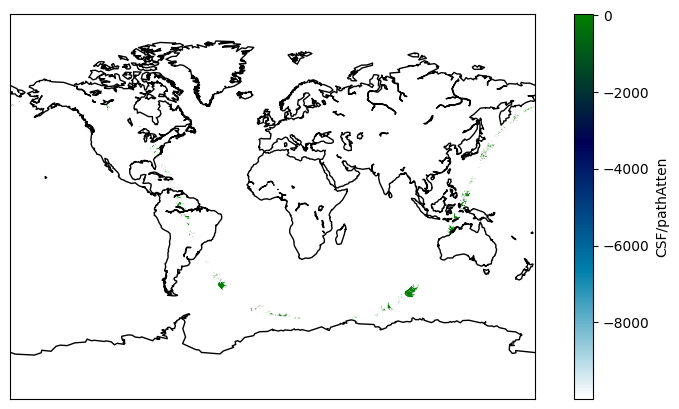

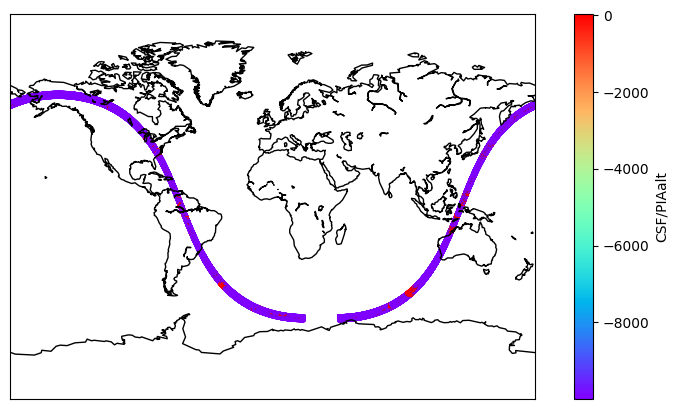

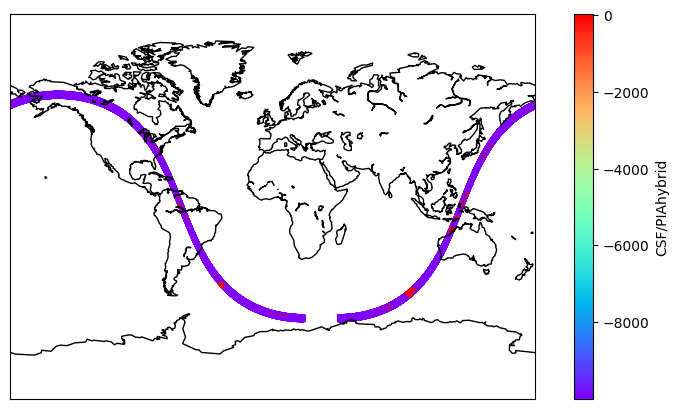

In [11]:
figsize = (10, 5)

fig, axes = plt.subplots(figsize=figsize)
# plotting pathAtten
map_pathAtten = Basemap(projection='mill', lon_0=0)
map_pathAtten.drawcoastlines()
x, y = map_pathAtten(longs, lats)
im = map_pathAtten.scatter(x, y, c=pathAtten, cmap='ocean_r', zorder=1, s=1)
cbar = plt.colorbar(im, label='CSF/pathAtten')
plt.show()


fig, axes = plt.subplots(figsize=figsize)
# plotting PIAalt
map_PIAalt = Basemap(projection='mill', lon_0=0)
map_PIAalt.drawcoastlines()
x, y = map_PIAalt(longs, lats)
im = map_PIAalt.scatter(x, y, c=PIAalt[:,:,0], cmap='rainbow', zorder=1, s=1)
cbar = plt.colorbar(im, label='CSF/PIAalt')
plt.show()

fig, axes = plt.subplots(figsize=figsize)
# plotting PIAhybrid
map_PIAhybrid = Basemap(projection='mill', lon_0=0)
map_PIAhybrid.drawcoastlines()
x, y = map_PIAhybrid(longs, lats)
im = map_PIAhybrid.scatter(x, y, c=PIAhybrid, cmap='rainbow', zorder=1, s=1)
cbar = plt.colorbar(im, label='CSF/PIAhybrid')
plt.show()

## Ku DSD Group
https://gpmweb2https.pps.eosdis.nasa.gov/pub/GPMfilespec/filespec.GPM.pdf#page=1500

In [12]:
phase = data['/FS/DSD/phase']


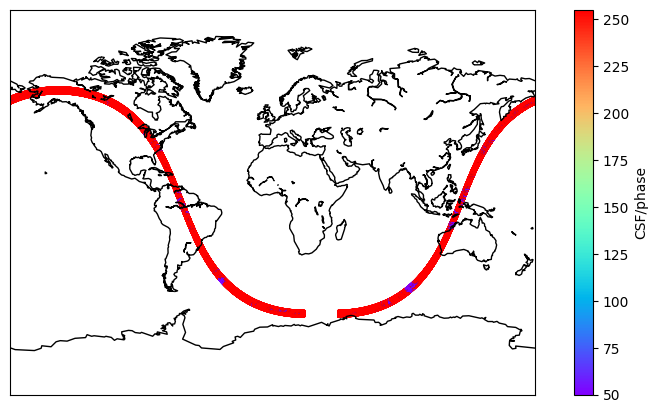

In [13]:
figsize = (10, 5)

fig, axes = plt.subplots(figsize=figsize)
# plotting phase
map_phase = Basemap(projection='mill', lon_0=0)
map_phase.drawcoastlines()
x, y = map_phase(longs, lats)
im = map_phase.scatter(x, y, c=phase[:,:,0], cmap='rainbow', zorder=1, s=1)
cbar = plt.colorbar(im, label='CSF/phase')
plt.show()

## Ku Experimental Group
https://gpmweb2https.pps.eosdis.nasa.gov/pub/GPMfilespec/filespec.GPM.pdf#page=1501

In [14]:
precipRateESurface2 = data['/FS/Experimental/precipRateESurface2']

seaIceConcentration = data['/FS/Experimental/seaIceConcentration']


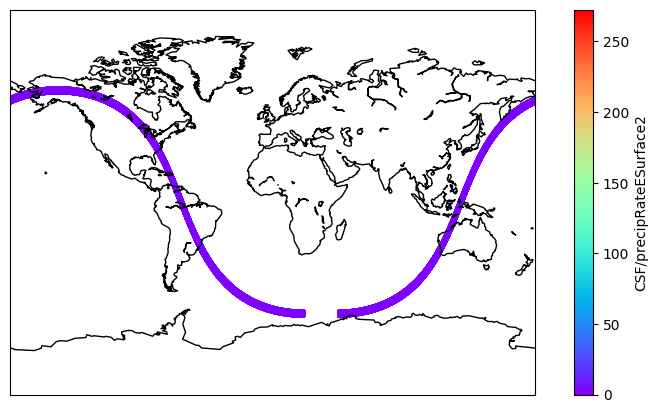

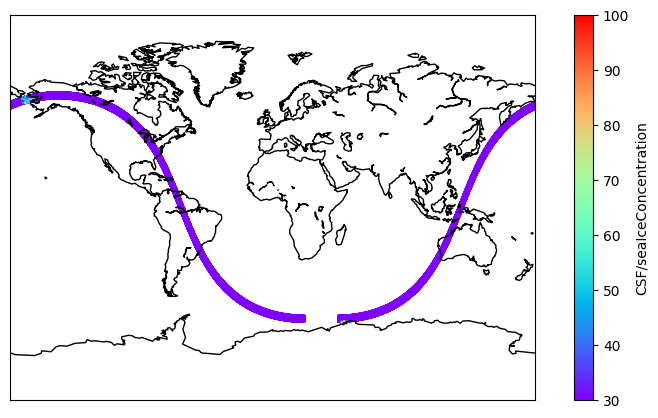

In [15]:
figsize = (10, 5)

fig, axes = plt.subplots(figsize=figsize)
# plotting precipRateESurface2
map_precipRateESurface2 = Basemap(projection='mill', lon_0=0)
map_precipRateESurface2.drawcoastlines()
x, y = map_precipRateESurface2(longs, lats)
im = map_precipRateESurface2.scatter(x, y, c=precipRateESurface2, cmap='rainbow', zorder=1, s=1)
cbar = plt.colorbar(im, label='CSF/precipRateESurface2')
plt.show()

fig, axes = plt.subplots(figsize=figsize)
# plotting seaIceConcentration
map_seaIceConcentration = Basemap(projection='mill', lon_0=0)
map_seaIceConcentration.drawcoastlines()
x, y = map_seaIceConcentration(longs, lats)
im = map_seaIceConcentration.scatter(x, y, c=seaIceConcentration, vmin=30, vmax=100, cmap='rainbow', zorder=1, s=1)
cbar = plt.colorbar(im, label='CSF/seaIceConcentration')
plt.show()

## Ku SLV Group
https://gpmweb2https.pps.eosdis.nasa.gov/pub/GPMfilespec/filespec.GPM.pdf#page=1501

In [16]:
piaFinal = data['/FS/SLV/piaFinal']

precipRate = data['/FS/SLV/precipRate']

precipRateNearSurface = data['/FS/SLV/precipRateNearSurface']

precipRateESurface = data['/FS/SLV/precipRateESurface']

precipRateAve24 = data['/FS/SLV/precipRateAve24']


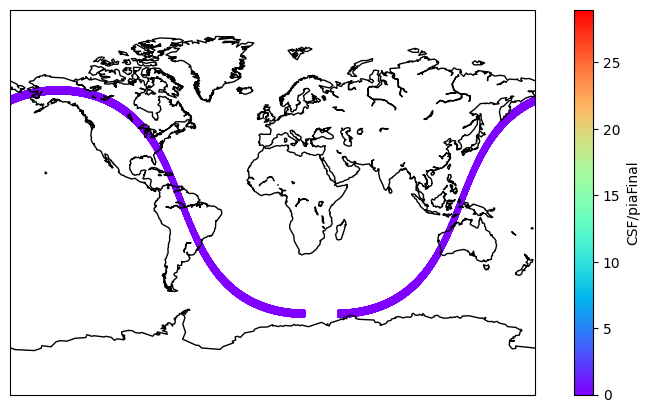

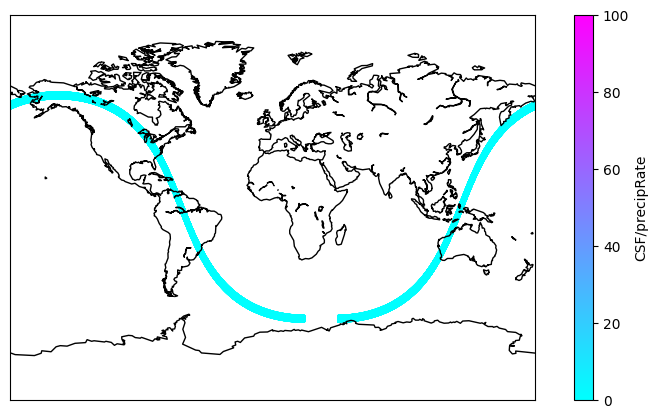

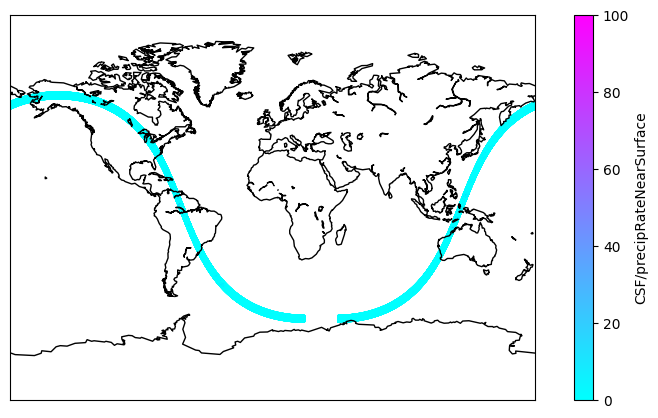

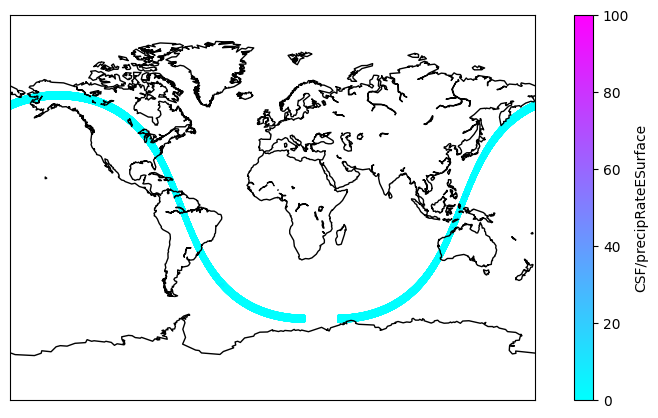

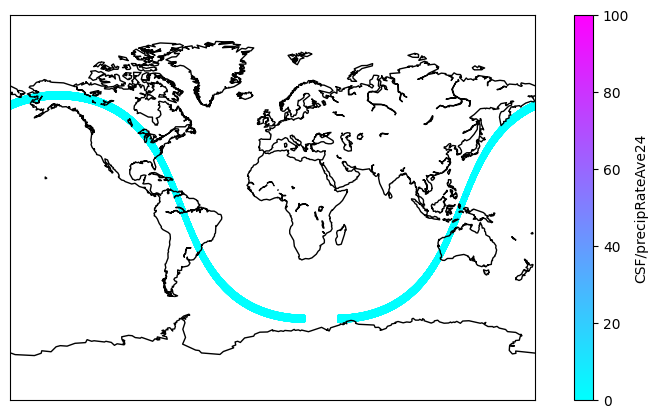

In [17]:
figsize = (10, 5)

fig, axes = plt.subplots(figsize=figsize)
# plotting piaFinal
map_piaFinal = Basemap(projection='mill', lon_0=0)
map_piaFinal.drawcoastlines()
x, y = map_piaFinal(longs, lats)
im = map_piaFinal.scatter(x, y, c=piaFinal, cmap='rainbow', zorder=1, s=1)
cbar = plt.colorbar(im, label='CSF/piaFinal')
plt.show()

fig, axes = plt.subplots(figsize=figsize)
# plotting precipRate
map_precipRate = Basemap(projection='mill', lon_0=0)
map_precipRate.drawcoastlines()
x, y = map_precipRate(longs, lats)
im = map_precipRate.scatter(x, y, c=precipRate[:,:,0], vmin=0, vmax=100, cmap='cool', zorder=1, s=1)
cbar = plt.colorbar(im, label='CSF/precipRate')
plt.show()


fig, axes = plt.subplots(figsize=figsize)
# plotting precipRateNearSurface
map_precipRateNearSurface = Basemap(projection='mill', lon_0=0)
map_precipRateNearSurface.drawcoastlines()
x, y = map_precipRateNearSurface(longs, lats)
im = map_precipRateNearSurface.scatter(x, y, c=precipRateNearSurface, vmin=0, vmax=100, cmap='cool', zorder=1, s=1)
cbar = plt.colorbar(im, label='CSF/precipRateNearSurface')
plt.show()


fig, axes = plt.subplots(figsize=figsize)
# plotting precipRateESurface
map_precipRateESurface = Basemap(projection='mill', lon_0=0)
map_precipRateESurface.drawcoastlines()
x, y = map_precipRateESurface(longs, lats)
im = map_precipRateESurface.scatter(x, y, c=precipRateESurface, vmin=0, vmax=100, cmap='cool', zorder=1, s=1)
cbar = plt.colorbar(im, label='CSF/precipRateESurface')
plt.show()

fig, axes = plt.subplots(figsize=figsize)
# plotting precipRateAve24
map_precipRateAve24 = Basemap(projection='mill', lon_0=0)
map_precipRateAve24.drawcoastlines()
x, y = map_precipRateAve24(longs, lats)
im = map_precipRateAve24.scatter(x, y, c=precipRateAve24, vmin=0, vmax=100, cmap='cool', zorder=1, s=1)
cbar = plt.colorbar(im, label='CSF/precipRateAve24')
plt.show()